<a href="https://colab.research.google.com/github/jpequegn/wkoAnalysis/blob/master/notebooks/Inscyd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Results from Inscyd
weight = 65
vo2max = 60.6
vlamax = 0.31
ftp = 274

In [3]:
t = np.arange(0, 350, 1) # 

## Approximate the lack of pyruvate curve - wild guess

In [4]:
def getPyruCurve(vlamax, vo2max, ftp):
    # Inscyd videos say that this portion is pretty much linear. It may be anchored around vlamax?
    pyru = vlamax + 0.0044 *(t - 50) # Assumes no lactate produced below 50W, 0.004 is calibrated to the report
    # Calibrate to reach a minima at Threshold
    factor = (vlamax + 0.0044*(ftp-50)) / np.exp(ftp/vo2max)
    # lactate accumulation is likely exponential. Maybe factored by vo2max?
    lact = np.exp(t/vo2max)*factor
    s = np.maximum(pyru - lact, 0)
    v = np.maximum(lact - pyru, 0)
    return s+v

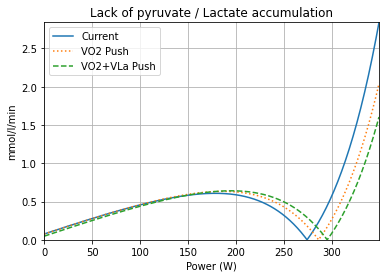

In [5]:
z = getPyruCurve(vlamax, vo2max, ftp)
x = getPyruCurve(0.28, 63, 295)
y = getPyruCurve(0.31, 63, 286)
plt.plot(t, z, label='Current', linestyle='solid')
plt.plot(t, y, label='VO2 Push', linestyle='dotted')
plt.plot(t, x, label='VO2+VLa Push', linestyle='dashed')
plt.xlabel('Power (W)')
plt.ylabel('mmol/l/min')
plt.title('Lack of pyruvate / Lactate accumulation')
plt.grid(True)
plt.margins(0)
plt.legend()

## Playing with scenarios - VO2Max -> 63, VLaMax -> 0.28

In [20]:
vlamax = 0.31
vo2max = 60.6
ftp = 255

In [21]:
# Rebase the approximated factor
factor = (vlamax+0.0044*(ftp-50))/np.exp(ftp/vo2max)

In [22]:
def getReadings(watt):
    pyru = vlamax + 0.0044*(watt-50)
    lact = np.exp(watt/vo2max)*factor
    return abs(pyru-lact)

In [9]:
# Recovery window was set at 190~300 so lets check that based on the approximations
print(getReadings(196),getReadings(350))

0.49460119056465957 4.1820227111065496


In [10]:
def getPyruMax():
    watt, currMax = 50, 0
    while getReadings(watt)> currMax:
        currMax = getReadings(watt)
        watt +=1
    return watt, currMax

In [11]:
def getLactShuttle(lact):
    watt = ftp
    while getReadings(watt)<lact:
        watt +=1
    return watt

In [12]:
def estimate5MinPower(vo2max):
  return (vo2max-7)/10.8 * weight

In [13]:
watt, lact = getPyruMax()
lshigh = getLactShuttle(lact)
print(watt, lshigh, lact)

164 282 0.5416308253817188


In [14]:
# Lactate shuttle window becomes
print("This is the lactate shuttle window " + str(watt) + " - " + str(lshigh))

This is the lactate shuttle window 164 - 282


In [40]:
estimate5MinPower(65)

349.0740740740741

In [39]:
# Power at Vo2max was 315W, FTP is 87% of vo2max
# so if FTP as a % of vo2max remains stable then a 3 pt Vo2max increase should result in
targetFTP = 274 + 0.87 * (estimate5MinPower(65) - estimate5MinPower(60.6))
targetFTP

297.0388888888889

In [29]:
# This matches quite close the Inscyd report, which would imply the explain of a -0.1 VLaMax impact
VLa01 = (295 - 286)/3
VLa01

3.0

In [ ]:
# FTP grows by 3W for every 0.01 VLaMax drop